# Coding Examples - Survey Response Analysis

This notebook and associated notebooks are intended to provide examples of code a methodologies for implementing various suggested free text survey response analysis features 

# Contents

Some of the components are included in the notebook, others are compartmentalised in other notebooks as they have to run on different Kernels

## 1 Key Words / Common Words
### Method 1 - Python library NLTK

## 2 Word Cloud
### Method 1 - Python library WordCloud

## 3 Sentiment Analysis
### Method 1 - Python library NLTK
### Method 2 - Python library Gluon with MXNet backend
### Method 3 - Google API Sentiment Analysis
### Method 4 - Python library Keras with TensorFlow backend

## 4 Topic Analysis
### Method 1 - Python library Gensim

## 5 Entity Analysis
### Method 1 - Python library NLTK
### Method 2 - Python library SpaCy
### Method 3 - Google API Entity Analysis

# Notebook Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

# Obtain
Sample dataset is of a survey on "Women in advertising"

    -Long Form Question - "How could ads aimed at you be improved?" - 827 
    -Short Form Question - "Name a brand that really ‘gets you’ when it comes to their advertising." - 

From a total dataset of 1000 respondents.

The dataset has been manually labelled to provide comparison as well as to enable trained supervised learning models.

0 - Negative, 1 - Positive, 2 - Neutral

In [71]:
df = pd.read_csv('raw_data_labelled.csv')
df['Response'] = df['How could ads aimed at you be improved?']
df = df.drop(['How could ads aimed at you be improved?','0 - Negative'], axis=1)
df['Response'] = df['Response'].astype('str')
df['Response'] = df['Response'].str.lower()
df['Label'] = df["Label"].fillna(0.0).astype(int)
df = df.drop(df.index[827:833])
df.head(10)

,Label,Response
0,2,by using the real day woman that doesn't have ...
1,2,"stop gender stereotyping, show more women in ..."
2,2,be real without being patronising.
3,2,don't assume all women fit into defined boxes
4,2,not sure
5,2,use models of varied sizes
6,0,show more real people and not show everyone as...
7,2,feature bigger women
8,1,"using role models, highlight on women in power"
9,0,use a wide range of models varying in shape an...


In [62]:
df['Label'].value_counts()

1    312
2    296
0    219
Name: Label, dtype: int64

# Data Cleaning & Tokenisation

This section will take the imported data and split it into tokens

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
df.head()

,Label,Response
0,2,by using the real day woman that doesn't have ...
1,2,"stop gender stereotyping, show more women in ..."
2,2,be real without being patronising.
3,2,don't assume all women fit into defined boxes
4,2,not sure


In [72]:
tokenized_word=word_tokenize(df['Response'][0])

In [73]:
df['Tokens'] = 0
for i in tqdm(range(len(df['Response']))):
    df['Tokens'][i] = word_tokenize(df['Response'][i])

  0%|                                                                                                                                                                                                               | 0/827 [00:00<?, ?it/s]C:\Users\chris\AppData\Local\Continuum\anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 827/827 [00:00<00:00, 1318.93it/s]


In [74]:
list_tokens = df['Tokens'].str.join(',')

In [75]:
full_words = " ".join(response for response in df.Response)

In [77]:
full_tokens = word_tokenize(full_words)

In [78]:
full_tokens[:20]

['by',
 'using',
 'the',
 'real',
 'day',
 'woman',
 'that',
 'does',
 "n't",
 'have',
 'perfect',
 'figure',
 'hair',
 'and',
 'skin',
 'stop',
 'gender',
 'stereotyping',
 ',',
 'show']

## 1 Key Words / Common Words
### Method 1 - Python library NLTK

In [79]:
fdist = FreqDist(full_tokens)
fdist.most_common(10)

[('women', 371),
 ('more', 323),
 ('and', 275),
 ('.', 266),
 (',', 211),
 ('not', 203),
 ('of', 180),
 ('to', 160),
 ('be', 151),
 ('the', 136)]

In [80]:
punctuation =[char for char in punctuation]

In [81]:
stop_words=set(stopwords.words("english"))

In [82]:
filtered_tokens=[]
for w in full_tokens:
    if w not in stop_words:
        if w not in punctuation:
            filtered_tokens.append(w)

In [83]:
fdist = FreqDist(filtered_tokens)
fdist.most_common(10)

[('women', 371),
 ('real', 90),
 ("n't", 82),
 ('less', 78),
 ('realistic', 75),
 ('models', 70),
 ('use', 66),
 ('show', 59),
 ('woman', 53),
 ('people', 53)]

There are a number of issues with the above Tokenisation - most obviously the seperation of "n't"; there are a number of mechanisms to improve on this. One option is to uses a tokeniser optimsed for more casual language as likely used in a survey response.

In [84]:
casual_tokeniser = TweetTokenizer()
full_token_casual = casual_tokeniser.tokenize(full_words)
full_token_casual_clean = []
for w in full_token_casual:
    if w not in stop_words:
        if w not in punctuation:
            full_token_casual_clean.append(w)

In [85]:
fdist = FreqDist(full_token_casual_clean)
comparison = fdist.most_common(10)
fdist.most_common(10)

[('women', 370),
 ('real', 93),
 ('less', 78),
 ('realistic', 76),
 ('models', 70),
 ('use', 66),
 ('show', 59),
 ('people', 53),
 ('woman', 52),
 ('different', 52)]

### Lemmatisation and Stemming
Two mechanisms for reducing more complex word forms to their base component (the Stem or the Lemma). Work through different mechanisms and have pros and cons dependent on the scenario.

In [86]:
lem = WordNetLemmatizer()
stem = PorterStemmer()

In [87]:
full_lem = []
for i in full_token_casual_clean:
    full_lem.append(lem.lemmatize(i,"v"))

full_lem_clean = []
for w in full_lem:
    if w not in stop_words:
        if w not in punctuation:
            full_lem_clean.append(w)

fdist = FreqDist(full_lem_clean)
comparison.append(fdist.most_common(10))
fdist.most_common(10)

[('women', 370),
 ('size', 122),
 ('use', 113),
 ('real', 93),
 ('show', 89),
 ('model', 83),
 ('less', 78),
 ('realistic', 76),
 ('body', 62),
 ('make', 57)]

In [88]:
full_stem = []
for i in full_token_casual_clean:
    full_stem.append(i)
    
full_stem_clean = []
for w in full_stem:
    if w not in stop_words:
        if w not in punctuation:
            full_stem_clean.append(w)

fdist = FreqDist(full_stem_clean)
comparison.append(fdist.most_common(10))
fdist.most_common(10)

[('women', 370),
 ('real', 93),
 ('less', 78),
 ('realistic', 76),
 ('models', 70),
 ('use', 66),
 ('show', 59),
 ('people', 53),
 ('woman', 52),
 ('different', 52)]

Now that the tokeniser has been optimised the best tokens are added to the main DataFrame.

In [89]:
df['Tokens'] = 0
for i in range(len(df['Response'])):
    temp_token = casual_tokeniser.tokenize(df['Response'][i])
    temp_clean = []
    for w in temp_token:
        if w not in stop_words:
            if w not in punctuation:
                temp_clean.append(w)
    df['Tokens'][i] = temp_clean

C:\Users\chris\AppData\Local\Continuum\anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [90]:
df.head()

,Label,Response,Tokens
0,2,by using the real day woman that doesn't have ...,"[using, real, day, woman, perfect, figure, hai..."
1,2,"stop gender stereotyping, show more women in ...","[stop, gender, stereotyping, show, women, posi..."
2,2,be real without being patronising.,"[real, without, patronising]"
3,2,don't assume all women fit into defined boxes,"[assume, women, fit, defined, boxes]"
4,2,not sure,[sure]


# Word Cloud
## Method 1 - Python library WordCloud

In [91]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [92]:
wordcloud = WordCloud(max_words=100, background_color="white").generate(full_words)

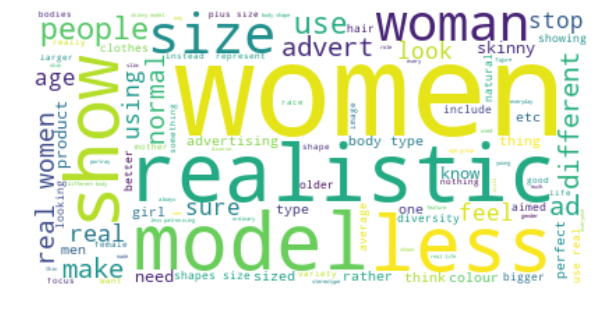

In [93]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [94]:
# Save the image to file
wordcloud.to_file("word_cloud.png")

# 3 Sentiment Analysis
## Method 1 - Python library NLTK

In [95]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [96]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [97]:
nltk_sentiment = SentimentIntensityAnalyzer()
score = nltk_sentiment.polarity_scores(df['Response'][0])

In [98]:
nltk_sentiment_scores = []
for i in tqdm(range(len(df['Response']))):
    temp = nltk_sentiment.polarity_scores(df['Response'][i])
    nltk_sentiment_scores.append(temp['compound'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 827/827 [00:00<00:00, 3426.75it/s]


In [99]:
df.head()

,Label,Response,Tokens
0,2,by using the real day woman that doesn't have ...,"[using, real, day, woman, perfect, figure, hai..."
1,2,"stop gender stereotyping, show more women in ...","[stop, gender, stereotyping, show, women, posi..."
2,2,be real without being patronising.,"[real, without, patronising]"
3,2,don't assume all women fit into defined boxes,"[assume, women, fit, defined, boxes]"
4,2,not sure,[sure]


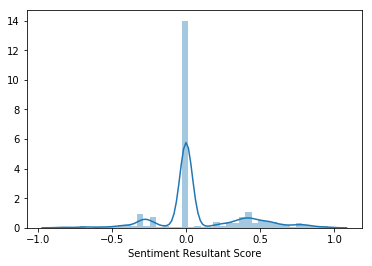

In [100]:
sns.distplot(nltk_sentiment_scores)
plt.xlabel('Sentiment Resultant Score')
plt.show()

In [103]:
df['Word_count'] = 0
for i in tqdm(range(len(df['Response']))):
    df['Word_count'][i] = len(df['Tokens'][i])
    

  0%|                                                                                                                                                                                                               | 0/827 [00:00<?, ?it/s]C:\Users\chris\AppData\Local\Continuum\anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 827/827 [02:38<00:00,  3.87it/s]


In [113]:
nltk_sentiment_compound = []
nltk_sentiment_neg = []
nltk_sentiment_pos = []
nltk_sentiment_neu = []
for i in tqdm(range(len(df['Response']))):
    temp = nltk_sentiment.polarity_scores(df['Response'][i])
    nltk_sentiment_compound.append(temp['compound'])
    nltk_sentiment_neg.append(temp['neg'])
    nltk_sentiment_pos.append(temp['pos'])
    nltk_sentiment_neu.append(temp['neu'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 827/827 [00:00<00:00, 3434.03it/s]


In [115]:
df['nltk_sentiment_compound']=nltk_sentiment_compound
df['nltk_sentiment_neg'] = nltk_sentiment_neg
df['nltk_sentiment_pos'] = nltk_sentiment_pos
df['nltk_sentiment_neu'] = nltk_sentiment_neu

In [105]:
score

{'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'compound': -0.4585}

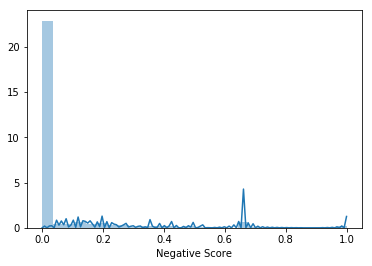

In [106]:
sns.distplot(nltk_sentiment_negs)
plt.xlabel('Negative Score')
plt.show()

In [116]:
df.head()

,Label,Response,Tokens,Word_count,nltk_sentiment_compound,nltk_sentiment_neg,nltk_sentiment_pos,nltk_sentiment_neu
0,2,by using the real day woman that doesn't have ...,"[using, real, day, woman, perfect, figure, hai...",8,-0.4585,0.187,0.000,0.813
1,2,"stop gender stereotyping, show more women in ...","[stop, gender, stereotyping, show, women, posi...",34,-0.6741,0.152,0.072,0.775
2,2,be real without being patronising.,"[real, without, patronising]",3,0.0000,0.000,0.000,1.000
3,2,don't assume all women fit into defined boxes,"[assume, women, fit, defined, boxes]",5,0.3612,0.000,0.263,0.737
4,2,not sure,[sure],1,-0.2411,0.662,0.000,0.338


## Method 2 - Python library Gluon with MXNet backend

Please see Notebook - Python library Gluon with MXNet backend

## Method 3 - Google API Sentiment Analysis

In [46]:
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [107]:
#Setup

path = '/Users/chris/OneDrive/flatiron/own_work/attest/google_credentials.json' 
client = language.LanguageServiceClient.from_service_account_json(path)

In [108]:
def google_sentiment(input):
    document = language.types.Document(
            content=input,
            type=language.enums.Document.Type.PLAIN_TEXT)
    annotations = client.analyze_sentiment(document=document)
    score = annotations.document_sentiment.score
    magnitude = annotations.document_sentiment.magnitude
    return score, magnitude

In [121]:
google_score = []
google_magnitude = []
for i in tqdm(range(len(df['Response']))):
    google_score.append(google_sentiment(df['Response'][i])[0])
    google_magnitude.append(google_sentiment(df['Response'][i])[1])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 827/827 [05:46<00:00,  2.72it/s]


In [140]:
google_sentiment_df = pd.DataFrame({'google_score':google_score, 'google_magnitude':google_magnitude})

In [141]:
google_sentiment_df.head()

,google_score,google_magnitude
0,-0.2,0.2
1,-0.7,1.4
2,-0.3,0.3
3,0.0,0.0
4,0.0,0.0


In [142]:
google_sentiment_df.to_csv('google_sentiment_df.csv')

In [143]:
df['google_score'] = google_score
df['google_magnitude'] = google_magnitude

## Method 4 - Python library Keras with TensorFlow backend

Please see Sentiment Analysis - Python library Keras with TensorFlow backend

# 4 Topic Analysis
## Method 1 - Python library Gensim

Please see Topic Analysis - Python library Gensim

# 5 Entity Analysis

## Method 1 - Python library NLTK

Please see Entity Analysis - Python library SpaCy

## Method 2 - Python library SpaCy

Please see Entity Analysis - Python library SpaCy

## Method 3 - Google API Entity Analysis

In [145]:
import six
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

### Example

In [146]:
text = 'Acton is in London, Heathrow is a place nearby.'

if isinstance(text, six.binary_type):
    text = text.decode('utf-8')

# Instantiates a plain text document.
document = types.Document(
    content=text,
    type=enums.Document.Type.PLAIN_TEXT)

# Detects entities in the document. You can also analyze HTML with:
#   document.type == enums.Document.Type.HTML
entities = client.analyze_entities(document).entities

for entity in entities:
    entity_type = enums.Entity.Type(entity.type)
    print('=' * 20)
    print(u'{:<16}: {}'.format('name', entity.name))
    print(u'{:<16}: {}'.format('type', entity_type.name))
    print(u'{:<16}: {}'.format('salience', entity.salience))
    print(u'{:<16}: {}'.format('wikipedia_url',
          entity.metadata.get('wikipedia_url', '-')))
    print(u'{:<16}: {}'.format('mid', entity.metadata.get('mid', '-')))

name            : Heathrow
type            : LOCATION
salience        : 0.5222665667533875
wikipedia_url   : https://en.wikipedia.org/wiki/Heathrow_Airport
mid             : /m/03jn4
name            : Acton
type            : LOCATION
salience        : 0.37869492173194885
wikipedia_url   : https://en.wikipedia.org/wiki/Acton,_London
mid             : /m/0n8rm
name            : London
type            : LOCATION
salience        : 0.0990385040640831
wikipedia_url   : https://en.wikipedia.org/wiki/London
mid             : /m/04jpl


Function definition of the API call

In [147]:
def google_entity(text):
    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)
    entities = client.analyze_entities(document).entities
    output = []
    for entity in entities:
        entity_type = enums.Entity.Type(entity.type)
        ent_name = entity.name
        ent_type = entity_type.name
        ent_salience = round(entity.salience,4)
        ent_url = entity.metadata.get('wikipedia_url', '-')
        ent_mid = entity.metadata.get('mid', '-')
        output.append({'ent_name':ent_name,'ent_type':ent_type,
                       'ent_salience':ent_salience,'ent_url':ent_url,'ent_mid':ent_mid})
    return output

In [163]:
entities_test = []
for i in tqdm(range(5)):
    entities_test.append(google_entity(df['Response'][i]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.31it/s]


To demonstrate the entity analysis the second dataset will be used; the responses to the question "Name a brand that really ‘gets you’ when it comes to their advertising."

In [149]:
df2 = pd.read_csv('raw_data_short_text.csv', usecols=['Name a brand that really ‘gets you’ when it comes to their advertising.'])
df2['Response'] = df2['Name a brand that really ‘gets you’ when it comes to their advertising.']
df2 = df2.drop(['Name a brand that really ‘gets you’ when it comes to their advertising.'], axis=1)

In [150]:
df2.head(5)

,Response
0,There isn't one
1,Clarks shoes
2,Not sure
3,None
4,None


The simplest entity analysis to a specific question such as this is a simple value count of the responses; however there are a number of shortcomings principally that any response with more than one entity, or a mispelling will be only counted once and therefore the real totals are likely to be higher.

In [151]:
df2['Response'].value_counts()[:10]

Dove       74
Nike       34
None       31
Always     24
Next       18
L'Oréal    14
Sure       13
M&S        12
Nivea      12
Loreal     12
Name: Response, dtype: int64

In [186]:
df2 = df2.astype('str')

To improve on this the Google Entity API will be called, the code below will call the API for all the responses to the survey. The additional code here is to save this response from the API to a csv file. This is so that the set of API calls is only run once, and the responses can be retrieved locally.

In [189]:
entities = []
for i in tqdm(range(len(df2['Response']))):
    entities.append(google_entity(df2['Response'][i]))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 852/852 [02:59<00:00,  6.73it/s]


In [200]:
empty = np.zeros(len(entities))
entities_df = pd.DataFrame(empty)
entities_df['Entities'] = entities
entities_df = entities_df.drop(0,axis=1)
entities_df.to_csv('short_text_entities.csv')

In [203]:
entities_df2 = pd.read_csv('short_text_entities.csv', index_col = 'Unnamed: 0')
entities_df2.head()

,Entities
0,"[{'ent_name': 'one', 'ent_type': 'NUMBER', 'en..."
1,"[{'ent_name': 'Clarks', 'ent_type': 'ORGANIZAT..."
2,[]
3,"[{'ent_name': 'None', 'ent_type': 'OTHER', 'en..."
4,"[{'ent_name': 'None', 'ent_type': 'OTHER', 'en..."


In [208]:
company_name = []
company_url = []
for i in tqdm(range(len(entities))):
    for j in range(len(entities[i])):
            if entities[i][j]['ent_type'] == 'ORGANIZATION':
                company_name.append(entities[i][j]['ent_name'])
                company_url.append(entities[i][j]['ent_url'])
            if entities[i][j]['ent_url'] != '-':
                company_name.append(entities[i][j]['ent_name'])
                company_url.append(entities[i][j]['ent_url'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 852/852 [00:00<00:00, 169700.21it/s]


This is the list of the top 10 companies by number of reponses.

In [217]:
company_name[0].value_counts()[:10]

Dove       76
Nike       74
L'Oréal    32
M&S        28
Nivea      28
Loreal     24
Adidas     20
Apple      18
Tampax     16
Garnier    14
Name: 0, dtype: int64

The API entity response has for more useful information included such at the companies Wikipedia URL

In [222]:
entities[1][0]

{'ent_name': 'Clarks',
 'ent_type': 'ORGANIZATION',
 'ent_salience': 0.6528,
 'ent_url': 'https://en.wikipedia.org/wiki/C._&_J._Clark',
 'ent_mid': '/m/04d1sr'}